## Plot the generate daily cation concentrations

user_nl_elm specs: 
```
 hist_mfilt = 1, 1
 hist_nhtfrq = -96360, -24
 hist_dov2xy = .true., .true.
 hist_fincl2 = 'soil_pH', 'forc_app', 'forc_min', 'forc_pho', 'forc_gra', 'forc_sph',
            'primary_mineral_vr_1', 'cation_vr_1', 'cation_vr_2', 'cation_vr_3', 'cation_vr_4', 'cation_vr_5', 'silica_vr',
            'secondary_mineral_vr_1', 'armor_thickness_vr', 'ssa', 
            'primary_mineral', 'cation', 'silica', 'secondary_mineral', 
            'primary_added_vr_1', 'primary_dissolve_vr_1', 'primary_proton_flux_vr',
            'primary_h2o_flux_vr', 'primary_cation_flux_vr_1', 'r_dissolve_vr_1',
            'secondary_cation_flux_vr_1', 'secondary_mineral_flux_vr_1', 'r_precip_vr_1',
            'primary_prelease_vr', 'cation_leached_vr_1', 'cation_runoff_vr_1',
            'primary_added', 'primary_dissolve', 'primary_cation_flux',
            'secondary_cation_flux', 'secondary_mineral_flux', 'cation_leached',
            'cation_runoff', 'r_sequestration', 'background_weathering', 'background_weathering_vr_1'
```

In [1]:
import os
import xarray as xr
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

path_to_files = os.path.join(os.environ['PROJDIR'], 'E3SM', 'output', 
                             'ERW_20240315_HBR_1_ICB1850CNRDCTCBC_ad_spinup', 'run')

In [2]:
hr = xr.open_mfdataset(glob(os.path.join(path_to_files, '*.elm.h1.*-*-01-00000.nc')))

In [9]:
background_weathering = hr['background_weathering'][:, 0].resample(time = '1M').mean()
cations = hr['cation'][:, 0].resample(time = '1M').mean()
cation_leached = hr['cation_leached'][:, 0].resample(time = '1M').mean()

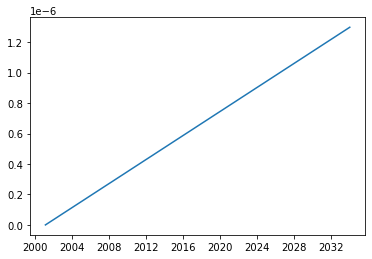

In [4]:
tvec = [pd.Timestamp(year=t.year+2000, month=t.month, day=t.day) for t in background_weathering['time'].values]

plt.plot(tvec, background_weathering.values)

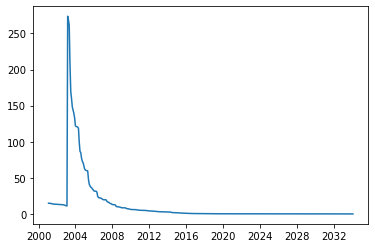

In [8]:
plt.plot(tvec, cations.values)

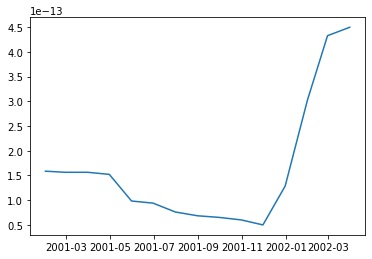

In [15]:
plt.plot(tvec[:15], cation_leached[:15])

In [ ]:
hr.close()